In [3]:
# Dependencies
import pandas as pd
import os
import requests
import numpy as np
from matplotlib import pyplot as plt
import json
import csv

In [91]:
# Import CSVs (2015)

player_data_15 = pd.read_csv("2015.csv")

player_data_15.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [95]:
# Import CSVs (2016)

player_data_16 = pd.read_csv("2016.csv")

player_data_16.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [94]:
# Import CSVs (2017)

player_data_17 = pd.read_csv("2017.csv")

player_data_17.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [93]:
# Import CSVs 2018

player_data_18 = pd.read_csv("2018.csv")

player_data.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [92]:
# Import CSVs

player_data_19 = pd.read_csv("2019.csv")

player_data_19.columns


Index(['Unnamed: 0', 'Player', 'Tm', 'Pos', 'Age', 'G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints'],
      dtype='object')

In [116]:
# Assemble new dataframes of runningbacks / Set Index to Positions / Set by year 
# Don't have to print all of them, just to show. 

#2019

data_pos_19 = player_data_19.set_index(["Pos"])

skill_data_19 = data_pos_19.drop(['QB','0','WR','TE'])

# 2018

data_pos_18 = player_data_18.set_index(["Pos"])

skill_data_18 = data_pos_18.drop(['QB','0','WR','TE'])

#2017

data_pos_17 = player_data_17.set_index(["Pos"])

skill_data_17 = data_pos_17.drop(['QB','0','WR','TE'])

#2016

data_pos_16 = player_data_16.set_index(["Pos"])

skill_data_16 = data_pos_16.drop(['QB','0','WR','TE'])

#2015

data_pos_15 = player_data_15.set_index(["Pos"])

skill_data_15 = data_pos_15.drop(['QB','0','WR','TE'])

skill_data_15.head(1)

,Unnamed: 0,Player,Tm,Age,G,GS,Cmp,Att,Yds,Int,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
Pos,,,,,,,,,,,,,,,,,,,,,
RB,1,Devonta Freeman,ATL,23.0,15.0,13.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1056.0,11.0,265.0,578.0,3.0,316.4


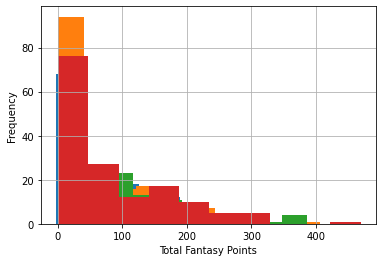

In [128]:
# find histogram 
fantasypoints_19 = skill_data_19["FantasyPoints"]

fantasypoints_18 = skill_data_18["FantasyPoints"]

fantasypoints_17 = skill_data_17["FantasyPoints"]

fantasypoints_16 = skill_data_16["FantasyPoints"]

fantasypoints_15 = skill_data_15["FantasyPoints"]

# Label Years // Try to Soften Colors

fantasypoints_15.hist()
fantasypoints_16.hist()
fantasypoints_18.hist()
fantasypoints_19.hist()
plt.xlabel("Total Fantasy Points")
plt.ylabel("Frequency")
plt.show()

In [124]:
desc_fantpts_19 = skill_data_19.describe()["FantasyPoints"]
desc_fantpts_19

count    153.000000
mean      79.707712
std       88.202045
min        0.300000
25%        9.800000
50%       48.200000
75%      135.400000
max      469.200000
Name: FantasyPoints, dtype: float64

In [129]:
desc_fantpts_18 = skill_data_18.describe()["FantasyPoints"]
desc_fantpts_18

count    155.000000
mean      79.670968
std       88.505393
min       -0.100000
25%        8.300000
50%       49.700000
75%      123.800000
max      385.500000
Name: FantasyPoints, dtype: float64

In [130]:
desc_fantpts_17 = skill_data_17.describe()["FantasyPoints"]
desc_fantpts_17

count    158.000000
mean      75.650886
std       80.852657
min       -0.200000
25%       11.000000
50%       45.800000
75%      123.400000
max      383.300000
Name: FantasyPoints, dtype: float64

In [131]:
# find q's 16

desc_fantpts_16 = skill_data_16.describe()["FantasyPoints"]
desc_fantpts_16

count    171.000000
mean      69.312281
std       81.040511
min       -0.400000
25%        8.000000
50%       35.300000
75%      107.000000
max      405.800000
Name: FantasyPoints, dtype: float64

In [132]:
# Find quartiles for '15'

desc_fantpts_15 = skill_data_15.describe()["FantasyPoints"]
desc_fantpts_15

count    165.000000
mean      70.762061
std       70.723497
min       -2.800000
25%       12.700000
50%       40.700000
75%      117.000000
max      316.400000
Name: FantasyPoints, dtype: float64

In [149]:
# Establishe top quartile per year

top_q_scorers_15 = skill_data_15[skill_data_15["FantasyPoints"].ge(117)]

top_q_scorers_16 = skill_data_16[skill_data_16["FantasyPoints"].ge(107)]

top_q_scorers_17 = skill_data_17[skill_data_17["FantasyPoints"].ge(123.4)]

top_q_scorers_18 =skill_data_18[skill_data_18["FantasyPoints"].ge(123.8)]

top_q_scorers_19 = skill_data[skill_data["FantasyPoints"].ge(136.4)]

# Build Columns of Rushing/Receiving Yds per Year, then Put into DF

# 2019

tq_rushyds_19 = top_q_scorers_19["RushingYds"]

tq_recyds_19 = top_q_scorers_19["ReceivingYds"]

tq_totalyds_19 = tq_rushyds_19 + tq_recyds_19


#2018

tq_rushyds_18 = top_q_scorers_18["RushingYds"]

tq_recyds_18 = top_q_scorers_18["ReceivingYds"]

tq_totalyds_18 = tq_rushyds_18 + tq_recyds_18


#2017

tq_rushyds_17 = top_q_scorers_17["RushingYds"]

tq_recyds_17 = top_q_scorers_17["ReceivingYds"]

tq_totalyds_17 = tq_rushyds_17 + tq_recyds_17


#2016

tq_rushyds_16 = top_q_scorers_16["RushingYds"]

tq_recyds_16 = top_q_scorers_16["ReceivingYds"]

tq_totalyds_16 = tq_rushyds_16 + tq_recyds_16


#2015

tq_rushyds_15 = top_q_scorers_15["RushingYds"]

tq_recyds_15 = top_q_scorers_15["ReceivingYds"]

tq_totalyds_15 = tq_rushyds_15 + tq_recyds_15

#big_df = pd.DataFrame({
    
 #   "'15 Rushing Yds'": tq_rushyds_15,
  #  "'15 Receiving Yds'": tq_rushyds_15,
   # "'15 Total Yds'": tq_totalyds_15,
   # "'16 Rushing Yds'": tq_rushyds_16,
   # "'16 Receiving Yds'": tq_recyds_16,
   # "'16 Total Yds'": tq_totalyds_16,
   # "'17 Rushing Yds'": tq_rushyds_17,
   # "'17 Receiving Yds'": tq_recyds_17,
   # "'17 Total Yds'": tq_totalyds_17,
   # "'18 Rushing Yds'": tq_rushyds_18,
   # "'18 Receiving Yds'": tq_recyds_18,
   # "'18 Total Yds'": tq_totalyds_18,
   # "'19 Rushing Yds'": tq_rushyds_19,
   # "'19 Receiving Yds'": tq_recyds_19,
   # "'19 Total Yds'": tq_totalyds_19})



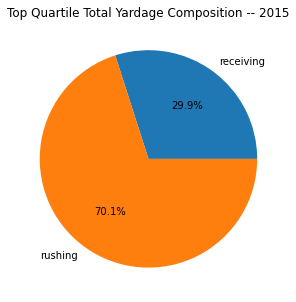

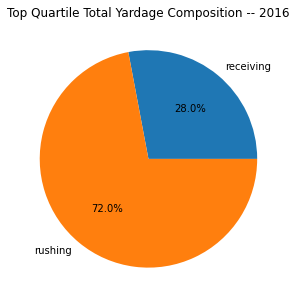

In [177]:
# plot the pie charts -- TOP QUARTILE

labels = ["receiving","rushing"]

# 2015

sum_15_rushing = tq_rushyds_15.sum()

sum_15_receiving = tq_recyds_15.sum()

sizes_15 = [sum_15_receiving,sum_15_rushing]

plt.figure(figsize=(5,5))

plt.pie(sizes_15,labels=labels,autopct='%1.1f%%')

plt.title("Top Quartile Total Yardage Composition -- 2015")

# 2016

sum_16_rushing = tq_rushyds_16.sum()

sum_16_receiving = tq_recyds_16.sum()

sizes_16 = [sum_16_receiving,sum_16_rushing]

plt.figure(figsize=(5,5))

plt.pie(sizes_16, labels=labels, autopct='%1.1f%%')

plt.title("Top Quartile Total Yardage Composition -- 2016")

plt.show()

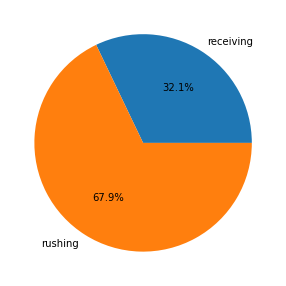

In [181]:
# Full League Split --- Rushing vs. Receiving

labels = ["receiving", "rushing"]

whole_sum_rush_15 = skill_data_15["RushingYds"].sum()

whole_sum_rec_15 = skill_data_15["ReceivingYds"].sum()

sizes_60 = [whole_sum_rec_15,whole_sum_rush_15]

plt.figure(figsize=(5,5))

plt.pie(sizes_60,labels=labels, autopct = '%1.1f%%')

plt.show()

In [152]:
#COME back to this if you have tim
desc_rec = skill_data_19.groupby(["Pos"]).describe()["Rec"]

desc_rec



116.0

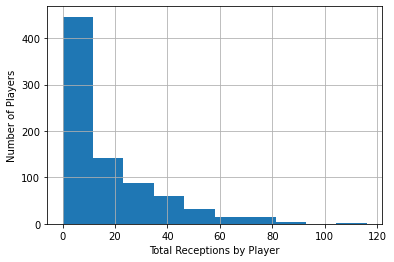

In [8]:
# Histogram --

rec_data_df = skill_data_19["Rec"]


rec_data_df.hist()
plt.xlabel("Total Receptions by Player")
plt.ylabel("Number of Players")
plt.show()


In [15]:
desc_rec = skill_data.groupby(["Pos"]).describe()["ReceivingYds"]

desc_rec


,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
RB,802.0,134.649626,162.674205,-6.0,17.0,73.0,200.75,1005.0


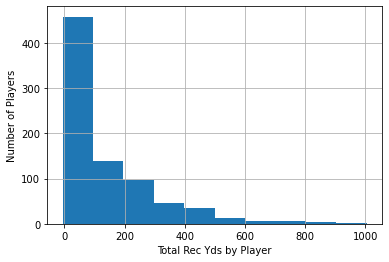

In [9]:
# Histogram --

recyds_df = skill_data["ReceivingYds"]


recyds_df.hist()
plt.xlabel("Total Rec Yds by Player")
plt.ylabel("Number of Players")
plt.show()
